## Learning Objective
(1) 使用 PyTorch 執行一個預先訓練的模型

## Session 2.1 利用預先訓練的模型來辨識圖像中的物體

In [12]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [13]:
alexnet=models.AlexNet()
resnet=models.resnet101(pretrained=True) #下載預先訓練好的Resnet101模型

/Users/andyw.p.chen/Documents/Project/2026_DL/virtual/lib/python3.14/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/andyw.p.chen/Documents/Project/2026_DL/virtual/lib/python3.14/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
## 對要輸入的圖片進行預處理
from torchvision import transforms ##transforms函式庫 方便對圖片進行預處理
preprocess = transforms.Compose([
    transforms.Resize(256),     #轉換尺寸
    transforms.CenterCrop(224), #裁剪圖片
    transforms.ToTensor(),      #轉化成張量
    transforms.Normalize(       #正規化
        mean=[0.485, 0.456, 0.406],
        std=[0.229,0.224,0.225]
    )
])

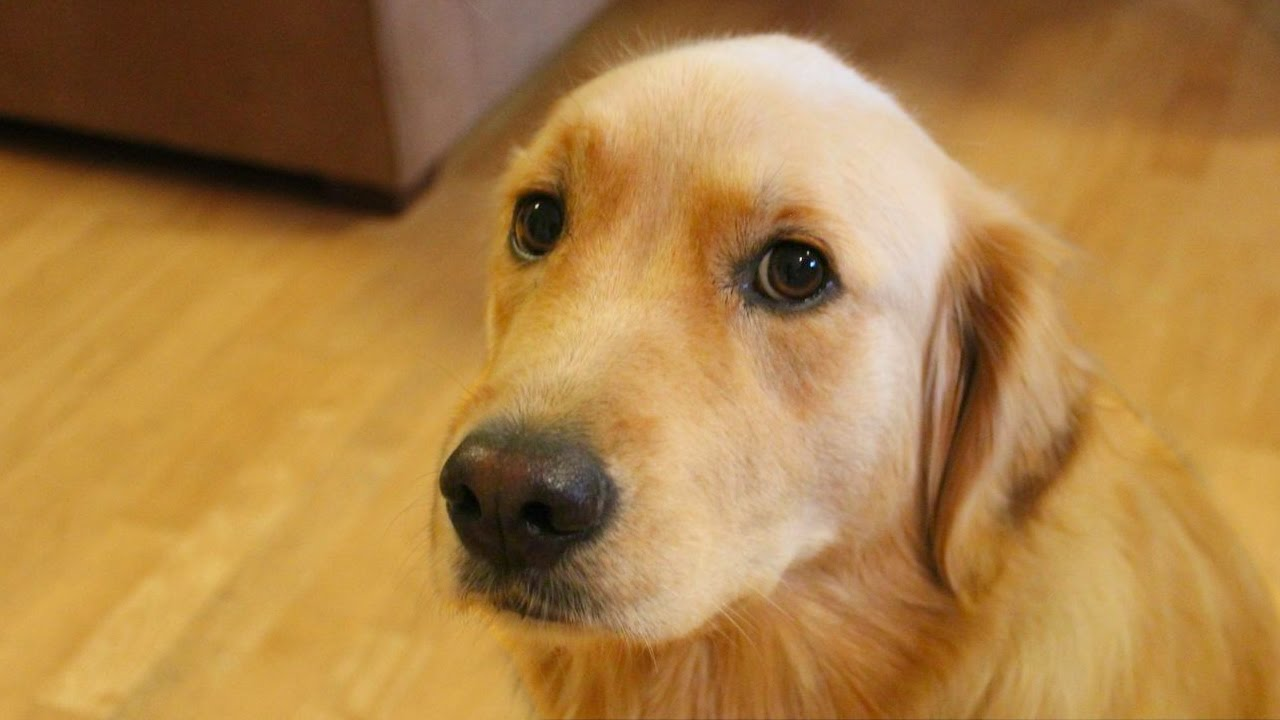

In [16]:
#pip install pillow
from PIL import Image #PIL python影像處理模組
import os
os.getcwd()
img= Image.open("../F1388_Code/data/p1ch2/bobby.jpg")
#img= Image.open("bobby.jpg")
img

In [17]:
img_t=preprocess(img)
img_t.shape

torch.Size([3, 224, 224])

In [18]:
import torch
batch_t=torch.unsqueeze(img_t,0) #在第0階增加一個代表批次量的階
# 因為ResNet 規定輸入資料必須是一個4D array 原本只為3D 3階
batch_t.shape

torch.Size([1, 3, 224, 224])

In [19]:
#把模型設定切換為eval模式才能進行推論
resnet.eval() #切換模式
out = resnet(batch_t)
print(out.shape, "前面的1 代表批次量，目前只有一張圖所以批次量為1")
print("")
print(out) #output出預測1000個類別的信心分數


torch.Size([1, 1000]) 前面的1 代表批次量，目前只有一張圖所以批次量為1

tensor([[-3.4997e+00, -1.6490e+00, -2.4391e+00, -3.2243e+00, -3.2465e+00,
         -1.3218e+00, -2.0395e+00, -2.5405e+00, -1.3043e+00, -2.8827e+00,
         -1.6696e+00, -1.2838e+00, -2.6184e+00, -2.9750e+00, -2.4380e+00,
         -2.8256e+00, -3.3083e+00, -7.9667e-01, -6.7075e-01, -1.2162e+00,
         -3.0311e+00, -3.9593e+00, -2.2631e+00, -1.0843e+00, -9.7916e-01,
         -1.0742e+00, -3.0908e+00, -2.4751e+00, -2.2153e+00, -3.1932e+00,
         -3.2964e+00, -1.8507e+00, -2.0642e+00, -2.1202e+00, -1.8665e+00,
         -3.2375e+00, -1.1210e+00, -1.1321e+00, -1.1657e+00, -9.0362e-01,
         -4.5209e-01, -1.4986e+00,  1.4366e+00,  1.2994e-01, -1.8379e+00,
         -1.4815e+00,  9.7278e-01, -9.3662e-01, -3.0276e+00, -2.7341e+00,
         -2.5960e+00, -2.0591e+00, -1.8170e+00, -1.9437e+00, -1.7875e+00,
         -1.3029e+00, -4.5200e-01, -2.0560e+00, -3.2882e+00, -4.7583e-01,
         -3.6261e-01, -1.1650e+00, -7.3943e-01, -1.4489e+00, -1

In [20]:
with open("../F1388_Code/data/p1ch2/imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

_, index = torch.max(out,1)

In [21]:
## 辨識出黃金獵犬
percentage =torch.nn.functional.softmax(out,dim=1)[0]*100  #torch.nn.functional.softmax 進行正規化
labels[index[0]], percentage[index[0]].item()

('golden retriever', 96.57190704345703)

In [22]:
## 計算辨識出排行前五的東西
_, indices = torch.sort(out, descending=True) #對分數進行排序，由高至低
[(labels[idx],percentage[idx].item()) for idx in indices[0][:5]] #列出分數前五高的類別

[('golden retriever', 96.57190704345703),
 ('Labrador retriever', 2.608269691467285),
 ('cocker spaniel, English cocker spaniel, cocker', 0.2699628472328186),
 ('redbone', 0.17958998680114746),
 ('tennis ball', 0.10991984605789185)]

## Session 2.2 利用預先訓練的模型來生成『假』圖片

In [23]:
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): 

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) 
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): 
        return self.model(input)

In [27]:
netG = ResNetGenerator() #建立好ResNet 生成器模型
model_path = "../F1388_Code/data/p1ch2/horse2zebra_0.4.0.pth" #預先訓練的模型參數
model_data = torch.load(model_path)  #讀取路徑data並取名為model_data
netG.load_state_dict(model_data) # load_state_dict將訓練過的參數載入netG

<All keys matched successfully>

In [28]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

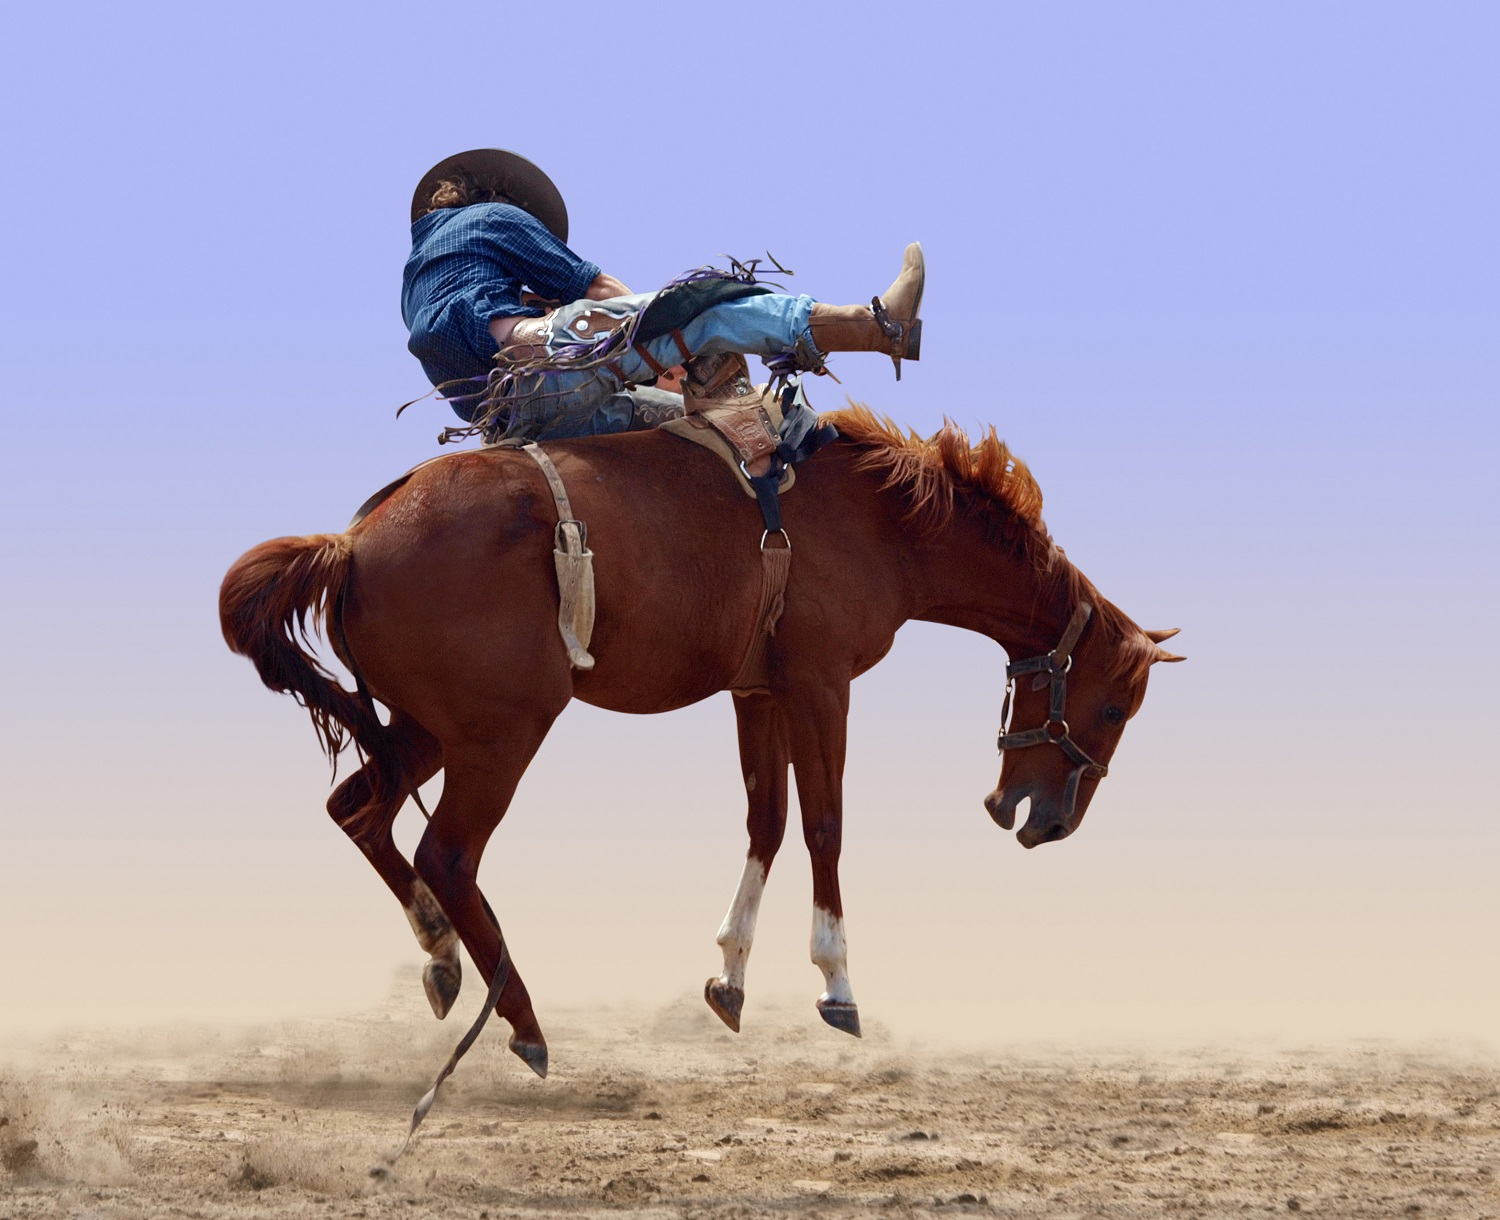

In [30]:
from PIL import Image
from torchvision import transforms
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.ToTensor()]) #定義預處理函式
img=Image.open("../F1388_code/data/p1ch2/horse.jpg")
img

In [33]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t,0) #在第0階加入一個批次軸，代表輸入的圖片數量
batch_out =netG(batch_t)
#batch_out #生成器輸出結果

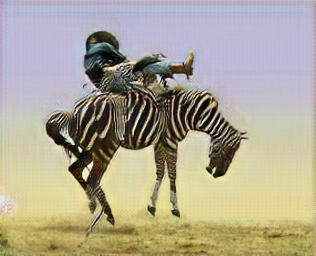

In [34]:
batch_out = torch.squeeze(batch_out,0) #將第0階去除，使batch_out變回一個3D張量
batch_out = (batch_out+1.0)/2.0 #明暗度調整
out_img = transforms.ToPILImage()(batch_out) #轉成圖片
out_img

## Session 2.3 能描述場景的神經網路模型

In [40]:
#!pip install h5py
#!pip install scikit-image
%run /Users/andyw.p.chen/Documents/Project/F1388_Code/p1ch2/eval.py --model .F1388_code/data/FC/fc-model.pth --infos_path ./F1388_code/data/FC/fc-infos.pkl --image_folder ./F1388_code/data/p1ch2/image

FileNotFoundError: [Errno 2] No such file or directory: './data/imagenet_weights/resnet101.pth'